In [28]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_benchmark(
    y: str,
    file_path: str = '/home/lg/sglang/实验/static_length_with_distribution/results_bs=5.jsonl'
):
    """
    Reads benchmark data from a JSONL file and plots a specified metric
    against the request rate.

    Args:
        y (str): The name of the metric to plot on the y-axis.
                 For example, 'request_throughput' or 'p99_e2e_latency_ms'.
        file_path (str, optional): The path to the JSONL benchmark report file.
                                   Defaults to '/home/lg/sglang/master_benchmark_report.jsonl'.
    """
    # --- 1. Validate Inputs ---
    if not y:
        print("Error: The 'y' parameter cannot be empty. Please specify a metric to plot.")
        return

    if not os.path.exists(file_path):
        print(f"Error: The file '{file_path}' was not found.")
        print("Please provide a valid path to your benchmark report.")
        return

    # --- 2. Read and Parse Data ---
    data = []
    try:
        with open(file_path, 'r') as f:
            for line in f:
                # Skip empty lines
                if line.strip():
                    data.append(json.loads(line))
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON from file: {e}")
        return
    except Exception as e:
        print(f"An unexpected error occurred while reading the file: {e}")
        return

    if not data:
        print("Error: The file is empty or contains no valid data.")
        return
        
    # Convert list of dictionaries to a pandas DataFrame for easy manipulation
    df = pd.DataFrame(data)

    # --- 3. Validate Data Columns ---
    x_axis = 'request_rate'
    if x_axis not in df.columns:
        print(f"Error: The required x-axis '{x_axis}' is not present in the data.")
        return
    if y not in df.columns:
        print(f"Error: The specified y-axis '{y}' is not present in the data.")
        available_columns = ", ".join(df.columns)
        print(f"Available metrics are: {available_columns}")
        return

    # Sort data by request_rate for a clean line plot
    df = df.sort_values(by=x_axis).reset_index(drop=True)

    # --- 4. Create and Display Plot ---
    plt.style.use('seaborn-v0_8-whitegrid') # Use a nice style for the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(df[x_axis], df[y], marker='o', linestyle='-', color='b')

    # Set titles and labels
    ax.set_title(f'{y} vs. {x_axis.replace("_", " ").title()}', fontsize=16)
    ax.set_xlabel(x_axis.replace("_", " ").title(), fontsize=12)
    ax.set_ylabel(y.replace("_", " ").title(), fontsize=12)
    
    # Improve layout and display the plot
    plt.tight_layout()
    plt.show()

### bs=5

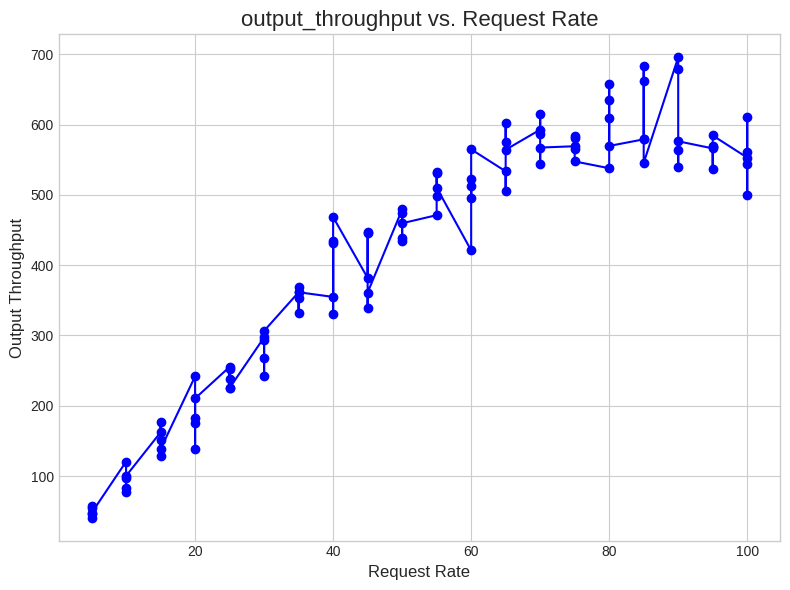

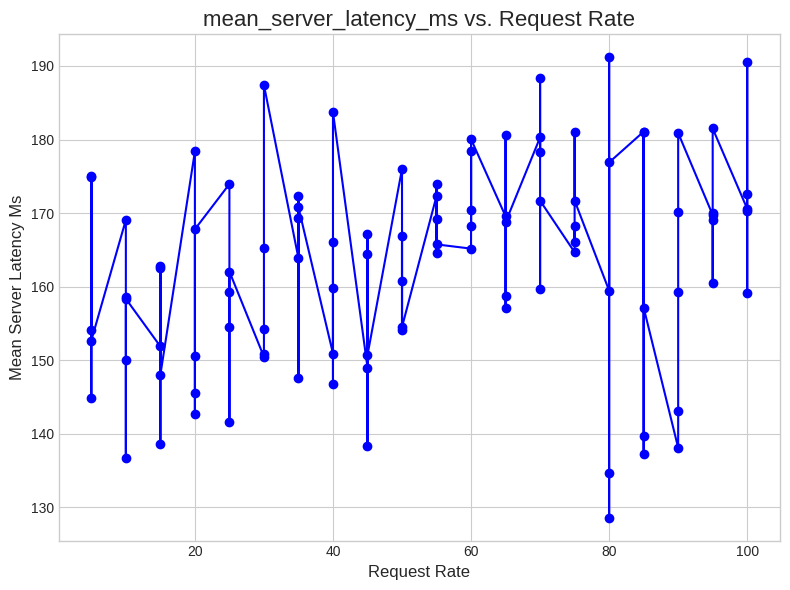

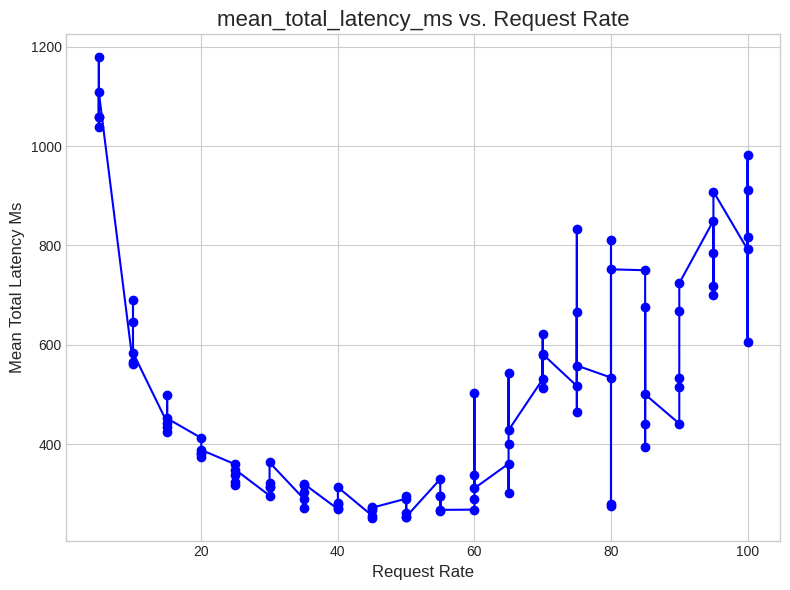

In [29]:
name = "/home/lg/sglang/实验/static_length_with_distribution/results_bs=10.jsonl"

plot_benchmark(y='output_throughput', file_path=name)
plot_benchmark(y='mean_server_latency_ms', file_path=name)
plot_benchmark(y='mean_total_latency_ms', file_path=name)

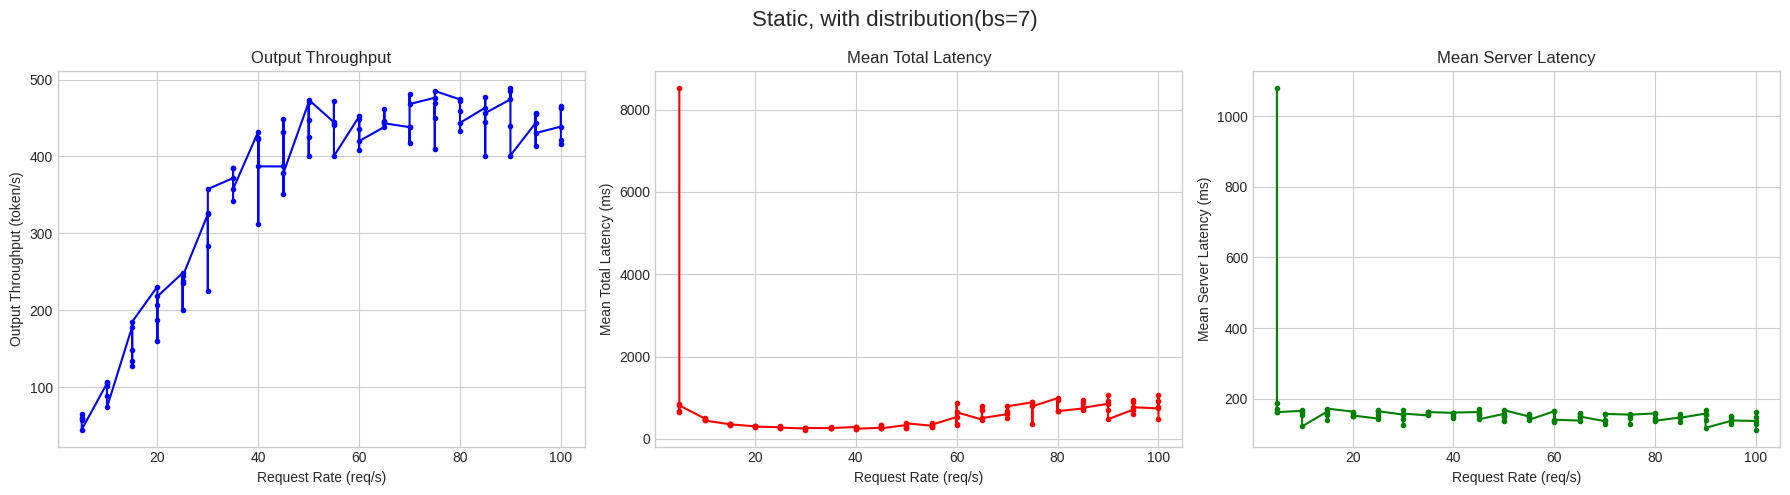

In [30]:
def plot_benchmark_single_file(name):
    # 从文件名中提取batch size
    import re
    bs_match = re.search(r'bs=(\d+)', name)
    bs = bs_match.group(1) if bs_match else "Unknown"
    
    # 读取数据
    data = []
    with open(name, 'r') as f:
        for line in f:
            if line.strip():  # 跳过空行
                data.append(json.loads(line))
    
    # 将数据转换为DataFrame并按request_rate排序
    import pandas as pd
    df = pd.DataFrame(data)
    df = df.sort_values('request_rate')
    
    # 提取排序后的数据点
    request_rates = df['request_rate'].tolist()
    output_throughputs = df['output_throughput'].tolist()
    mean_total_latencies = df['mean_total_latency_ms'].tolist()
    mean_server_latencies = df['mean_server_latency_ms'].tolist()
    
    # 创建图表
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'Static, with distribution(bs={bs})', fontsize=16)
    
    # 绘制输出吞吐量
    ax1.plot(request_rates, output_throughputs, 'b.-')
    ax1.set_xlabel('Request Rate (req/s)')
    ax1.set_ylabel('Output Throughput (token/s)')
    ax1.set_title('Output Throughput')
    ax1.grid(True)
    
    # 绘制平均总延迟
    ax2.plot(request_rates, mean_total_latencies, 'r.-')
    ax2.set_xlabel('Request Rate (req/s)')
    ax2.set_ylabel('Mean Total Latency (ms)')
    ax2.set_title('Mean Total Latency')
    ax2.grid(True)
    
    # 绘制平均服务器延迟
    ax3.plot(request_rates, mean_server_latencies, 'g.-')
    ax3.set_xlabel('Request Rate (req/s)')
    ax3.set_ylabel('Mean Server Latency (ms)')
    ax3.set_title('Mean Server Latency')
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

# 测试函数
name = "/home/lg/sglang/实验/static_length_with_distribution/static_batch_results_bs=7.jsonl"
plot_benchmark_single_file(name)
